 Dataset Selection & Preprocessing

In [2]:

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv(r"D:\projects\nlp\train.csv")
  
df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:

# Basic preprocessing: lowercase, remove links, mentions, special chars
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df["clean_text"] = df["text"].apply(clean_text)
df[["text", "clean_text", "target"]].head()


,text,clean_text,target
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,1
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...,1
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,1
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...,1


 Prompt Engineering

In [5]:

tweet = "Huge fire near the city center, people are being evacuated!"

prompt_1 = f"Classify: {tweet} (Answer Disaster / Not Disaster)"
prompt_2 = f"Read carefully: '{tweet}'. Does it describe a real disaster event?"
prompt_3 = f"You are an emergency analyst. Decide if the tweet below is about a real disaster. Tweet: {tweet}"

print("Prompt 1:", prompt_1)
print("Prompt 2:", prompt_2)
print("Prompt 3:", prompt_3)


Prompt 1: Classify: Huge fire near the city center, people are being evacuated! (Answer Disaster / Not Disaster)
Prompt 2: Read carefully: 'Huge fire near the city center, people are being evacuated!'. Does it describe a real disaster event?
Prompt 3: You are an emergency analyst. Decide if the tweet below is about a real disaster. Tweet: Huge fire near the city center, people are being evacuated!



Expected differences:  
- Prompt 1 → short, may lead to ambiguous answers.  
- Prompt 2 → clearer, more natural.  
- Prompt 3 → role-based, encourages contextual reasoning.  


Model Training & Evaluation

In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df["clean_text"]
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression baseline
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.70      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



# Step 4: Troubleshooting


**Likely Issue:**  
Tweets may contain sarcasm, jokes, or slang → model misclassifies them. This leads to **lower recall** (missing real disasters).  

**Solution:**  
- Collect more diverse training data.  
- Use transformer models (like DistilBERT) for better context.  
- Improve prompts by explicitly warning model about sarcasm.  
- Focus evaluation on Recall, not just Accuracy.  


C:\Users\Anupa\AppData\Local\Temp\ipykernel_25380\2108213068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


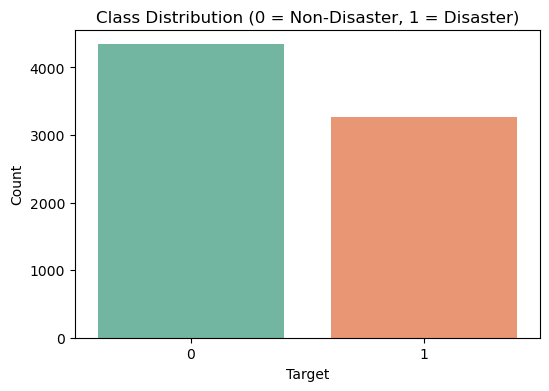

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Class Distribution (0 = Non-Disaster, 1 = Disaster)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig("class_distribution.png")
plt.show()
